                                                       SistersLab Bitirme Projesi - Başak Dilara Çevik

In [ ]:

import patoolib
patoolib.extract_archive("movies_dataset.zip", outdir=".")

In [1]:
import pandas as pd   

import os


folder = r'movies_dataset/'
count = 1
# count increase by 1 in each iteration
# iterate all files from a directory
for file_name in os.listdir(folder):
    try:
    # Construct old file name
        source = folder + file_name

    # Adding the count to the new file name and extension
        destination = folder + "movies_" + str(count) + ".csv"

    # Renaming the file
        os.rename(source, destination)
        count += 1
    except:
        pass
print('Tüm dosyaların isimleri değiştirildi.')

print('Yeni isimler: ')
# verify the result
res = os.listdir(folder)
print(res)
#Veri setlerini okuma
for i in range(1, 9):
    globals()['df{}'.format(i)] = pd.read_csv('movies_dataset/movies_{}.csv'.format(i), on_bad_lines='skip')


for df in range(1,8):
    globals()['df{}'.format(df)].dropna(inplace=True)
    globals()['df{}'.format(df)].drop_duplicates(inplace=True)
    globals()['df{}'.format(df)].reset_index(inplace=True, drop=True)

film = pd.concat([df2, df3, df4, df5, df7, df8]) #1 ve 6 şimdilik kullanılmıyor.
film



Tüm dosyaların isimleri değiştirildi.
Yeni isimler: 
['movies_1.csv', 'movies_2.csv', 'movies_3.csv', 'movies_4.csv', 'movies_5.csv', 'movies_6.csv', 'movies_7.csv', 'movies_8.csv']


,movieid,country,genre,language,title,year,name,rank,votes,distribution
0,1672052,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1672111,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1672111,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1672580,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1672716,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3768,2591814,NaN,NaN,NaN,NaN,NaN,NaN,6.8,56563.0,0000012210
3769,2592334,NaN,NaN,NaN,NaN,NaN,NaN,6.2,36951.0,0000122100
3770,2592963,NaN,NaN,NaN,NaN,NaN,NaN,7.6,2294.0,0000002311
3771,2593112,NaN,NaN,NaN,NaN,NaN,NaN,6.9,1231.0,0000012211


In [2]:
#Sütunların dağılımı
film.describe().T


,count,mean,std,min,25%,50%,75%,max
movieid,37371.0,2.153202e+06,269957.152639,1672052.0,1924700.0,2171943.0,2412518.0,2593313.0
year,3832.0,1.985354e+03,18.176435,1898.0,1981.0,1994.0,1997.0,2014.0
rank,3773.0,6.402968e+00,1.139101,1.8,5.7,6.5,7.2,9.3
votes,3771.0,2.771873e+04,63563.550897,5.0,1801.5,6938.0,25559.0,998823.0


In [3]:
film.isnull().sum()

movieid             0
country         32364
genre           27431
language        32395
title           33539
year            33539
name            27528
rank            33598
votes           33600
distribution    33600
dtype: int64

**Ülkelere göre film sayısı ve görselleştirilmesi**

In [4]:
film.dropna(subset=["country"], axis=0, inplace=True)
film_ulke = film.groupby("country").size()

film_ulke.sort_values(ascending=False).head(10)

pd.set_option('display.max_rows', None)
with open('film_ulke.txt', 'w') as f:
    f.write(str(film_ulke.sort_values(ascending=False)))


In [5]:
%matplotlib inline

*  Pie-chart için bir fonksiyon tanımlayalım.

In [6]:
import matplotlib.pyplot as plt
def ilk_10_ciz(x, y, title):
    
    colors = ['yellowgreen','red','gold','lightskyblue','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan']
    porcent = 100.*y/y.sum()

    patches, texts = plt.pie(y, colors=colors, shadow = True, startangle=90, radius=1.2, rotatelabels = True, textprops=dict(color="black"), 
    wedgeprops = { 'linewidth' :0.9, 'edgecolor' : 'white' }, labels=['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)])

    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

    sort_legend = True
    if sort_legend:
        patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

    plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

    plt.axis('equal')
    plt.text(0, 0, title, fontsize=20, color='black', ha='center', va='center')




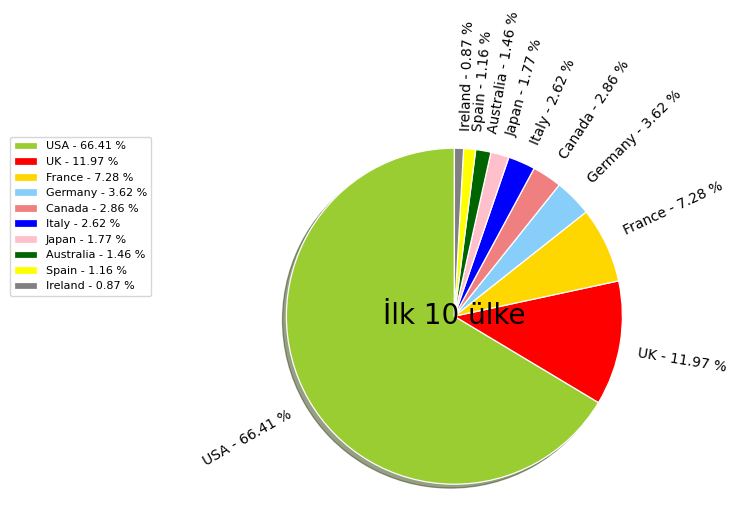

In [7]:
x = film_ulke.sort_values(ascending=False).head(10).index
y = film_ulke.sort_values(ascending=False).head(10).values
ilk_10_ciz(x, y, 'İlk 10 ülke')
plt.savefig('filmlerin_ulkelere_gore_dagilimi.png', bbox_inches='tight', dpi=600)

**Aktörlerin oynadığı film sayısı**

In [8]:
#aktor = pd.concat([df1, df6])
#aktor.set_index("actorid", inplace=True)


aktor = df1.join(df6.set_index("actorid"), on="actorid")
aktor.set_index(aktor["name"], inplace=True)

aktor.index.value_counts().sort_values(ascending=False).head(10)

with open('aktor.txt', 'w', encoding='utf-8') as f:
    f.write(str(aktor.index.value_counts().sort_values(ascending=False)))


* En çok filmde oynayan ilk 10 oyuncuyu çizmek için:

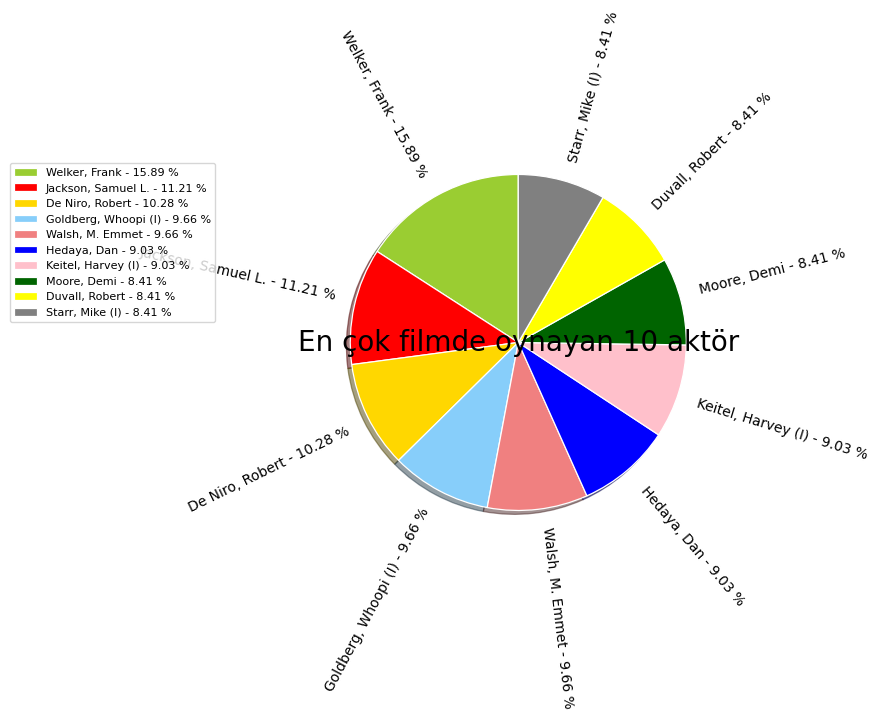

In [9]:
x = aktor.index.value_counts().sort_values(ascending=False).head(10).index
y = aktor.index.value_counts().sort_values(ascending=False).head(10).values
ilk_10_ciz(x, y, 'En çok filmde oynayan 10 aktör')
plt.savefig('en_cok_filmde_oynayan.png', bbox_inches='tight', dpi=600)

**Aktörlerin oynadığı film türleri**

In [27]:
aktor_tur = aktor.join(df3.set_index("movieid"), on="movieid")

aktor_tur.head(10)



with open('aktor_tur.txt', 'w', encoding='utf-8') as f:
    f.write(str(aktor_tur["genre"]))

**Ülkelere göre hangi tür filmler çekilmiş?** 


**Türe göre kadın-erkek aktör sayısı**